<a href="https://colab.research.google.com/github/Bhavya-2k03/Time-series-Forecasting/blob/main/Time_series_Forecasting(using_LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

In [3]:
!gdown --id 1kZ0536C-v1zVJEVb7rMuOqcKmWQBbwmb

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1kZ0536C-v1zVJEVb7rMuOqcKmWQBbwmb
To: /content/Alcohol_Sales.csv
100% 5.30k/5.30k [00:00<00:00, 5.88MB/s]


In [4]:
df=pd.read_csv("/content/Alcohol_Sales.csv")

In [5]:
df.columns=['Dates','Sales']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Dates   325 non-null    object
 1   Sales   325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


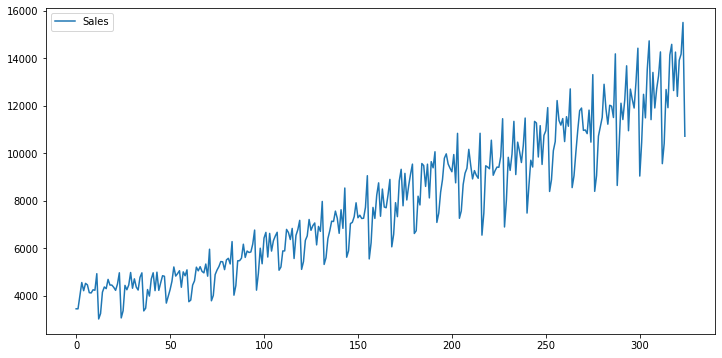

In [7]:
df.plot(figsize=(12,6))

In [8]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,train_size=0.95,shuffle=False)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [10]:
scaled_train=scaler.fit_transform(train["Sales"][:,np.newaxis])
scaled_test= scaler.fit_transform(test["Sales"][:,np.newaxis])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [12]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input=3
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [22]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100)               40800     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss=tf.keras.losses.mse,optimizer=tf.keras.optimizers.Adam(lr=0.001))
model.fit(generator,epochs=150,batch_size=30)

Epoch 1/150


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


305/305 [==============================] - 2s 3ms/step - loss: 0.0069
Epoch 2/150
305/305 [==============================] - 1s 3ms/step - loss: 0.0066
Epoch 3/150
305/305 [==============================] - 1s 3ms/step - loss: 0.0068
Epoch 4/150
305/305 [==============================] - 1s 3ms/step - loss: 0.0067
Epoch 5/150
305/305 [==============================] - 1s 3ms/step - loss: 0.0071
Epoch 6/150
305/305 [==============================] - 1s 3ms/step - loss: 0.0068
Epoch 7/150
305/305 [==============================] - 1s 3ms/step - loss: 0.0069
Epoch 8/150
305/305 [==============================] - 1s 3ms/step - loss: 0.0066
Epoch 9/150
305/305 [==============================] - 1s 3ms/step - loss: 0.0067
Epoch 10/150
305/305 [==============================] - 1s 3ms/step - loss: 0.0068
Epoch 11/150
305/305 [==============================] - 1s 3ms/step - loss: 0.0068
Epoch 12/150
305/305 [==============================] - 1s 3ms/step - loss: 0.0072
Epoch 13/150
305/305 [===

In [29]:
from tqdm import tqdm
test_predictions = []
first_eval_batch = scaled_train[-n_input:,:,np.newaxis]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
for i in tqdm(range(len(test))):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

100%|██████████| 17/17 [00:00<00:00, 18.40it/s]


In [31]:
true_predictions = scaler.inverse_transform(test_predictions)
# print(true_predictions)

In [32]:
test['Predictions'] = true_predictions

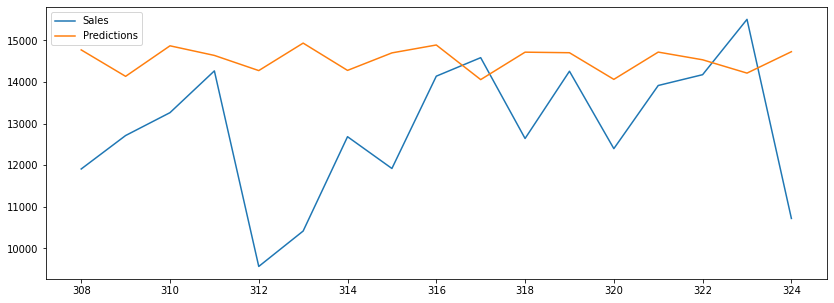

In [33]:
test.plot(figsize=(14,5))

In [ ]:
#Accuracy can be improved by tuning layer parametres, adding dropout layers ,etc.
